# –õ–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω–∞—è —Ä–∞–±–æ—Ç–∞ ‚Ññ4
## –ö—Ä–∏–≤–æ—à–µ–π–∫–∏–Ω –°–µ—Ä–≥–µ–π –†3214

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('4_f_1.csv', names = ['R'])
R = data.R
R

0      866
1      927
2      924
3      892
4      897
      ... 
295    842
296    829
297    806
298    883
299    882
Name: R, Length: 300, dtype: int64

##### 1. –ü–æ –∑–∞–¥–∞–Ω–Ω–æ–º—É –º–∞—Å—Å–∏–≤—É –∫–∞—Ä–¥–∏–æ–∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –∫–∞—Ä–¥–∏–æ—Ä–∏—Ç–º–æ–≥—Ä–∞–º–º—É,–ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—â—É—é —Å–æ–±–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –∫–∞—Ä–¥–∏–æ–∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤ –æ—Ç –≤—Ä–µ–º–µ–Ω–∏.

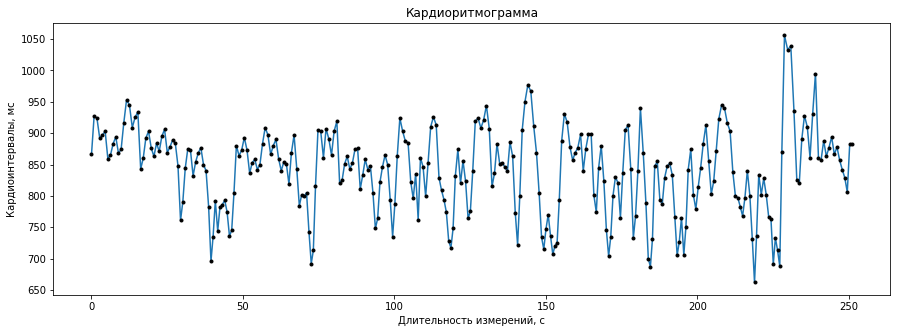

In [3]:
signal = np.array(R)
time_x = [0]
for i in range(0,len(signal)-1):
    time_x.append(signal[i]/1000+time_x[i])
plt.figure(figsize=(15, 5))
plt.plot(time_x, signal)
plt.plot(time_x, signal, '.', color='black')
plt.title('–ö–∞—Ä–¥–∏–æ—Ä–∏—Ç–º–æ–≥—Ä–∞–º–º–∞')
plt.ylabel('–ö–∞—Ä–¥–∏–æ–∏–Ω—Ç–µ—Ä–≤–∞–ª—ã, –º—Å')
plt.xlabel('–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∏–∑–º–µ—Ä–µ–Ω–∏–π, —Å')
plt.show()

##### –ö—É–±–∏—á–µ—Å–∫–∞—è –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏—è

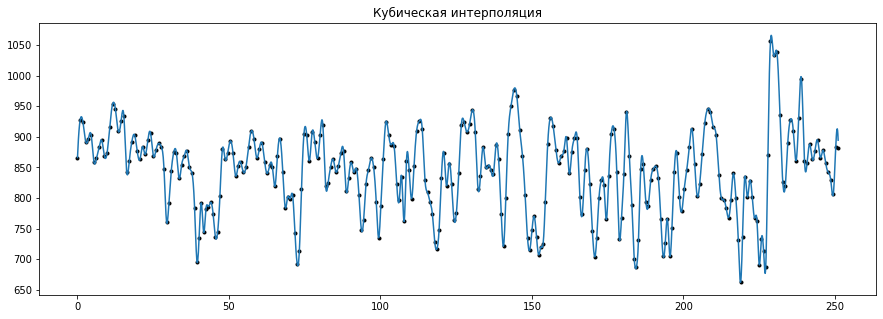

In [4]:
from scipy.interpolate import CubicSpline
cs = CubicSpline(time_x, signal)
xs = np.arange(0, max(time_x), 0.1)
plt.figure(figsize=(15, 5))
plt.title('–ö—É–±–∏—á–µ—Å–∫–∞—è –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏—è')
plt.plot(time_x, signal, '.', color='black')
plt.plot(xs, cs(xs))
plt.show()

##### 2. –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –§—É—Ä—å–µ

–î–ª—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –§—É—Ä—å–µ –ø–æ–ª—å–∑—É—é—Å—å –∫—É—Å–∫–æ–º –∫–æ–¥–∞, –∫–æ—Ç–æ—Ä—ã–π –î–º–∏—Ç—Ä–∏–π –ì–µ–Ω–Ω–∞–¥—å–µ–≤–∏—á –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–∏–ª –≤ —Ö–æ–¥–µ –∫–æ–Ω—Ñ–µ—Ä–µ–Ω—Ü–∏–∏ –≤ Zoom
https://stackoverflow.com/questions/25735153/plotting-a-fast-fourier-transform-in-python

In [5]:
import scipy.fftpack
def polarToRectangular(radii, angles):
    return radii * np.exp(1j * angles)

def sortZip(x, y):
    order = np.argsort(x)
    xs = np.array(x)[order]
    ys = np.array(y)[order]
    return xs, ys

def plotSort(x, y):
    xs, ys = sortZip(x, y)
    plt.plot(xs, ys)
    
def frequencyGenerator(time, steps=None):
    ùõø = time.max() - time.min()
    if steps is None:
        steps = int(ùõø / np.diff(time).mean() / 2)
    M = np.arange(1, steps + 1)
    return M / ùõø, steps

def easyFourierTransform(time, signal, frequency=None, steps=None, sorted=False, uniform=False):
    if sorted:
        ts = time
        Xs = signal
    else:
        ts, Xs = sortZip(time, signal)
    
    if frequency is None:
        frequency, steps = frequencyGenerator(ts, steps)
    else:
        steps = frequency.shape[0]
    
    if uniform:
        N = signal.shape[0]
        amplitude = np.abs(scipy.fftpack.fft(signal)[:steps]) * 2.0 / N
    else:
        ft = frequency[:, np.newaxis]
        ùúÉ = (ts - ts.min()) * 2 * np.pi * ft
        Y = polarToRectangular(Xs, ùúÉ)[:, 1:] * np.diff(ts)
        amplitude = np.abs(Y.sum(axis=1))
    return frequency, amplitude

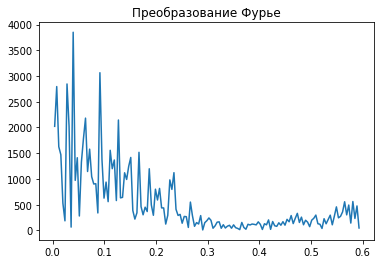

In [6]:
freq, sample_fourier = easyFourierTransform(time_x, signal)
plt.plot(freq, sample_fourier)
plt.title("–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –§—É—Ä—å–µ")
n_batch=len(freq)

##### 3. –†–∞—Å—Å—á–∏—Ç–∞—Ç—å —Å–ø–µ–∫—Ç—Ä–∞–ª—å–Ω—É—é –º–æ—â–Ω–æ—Å—Ç—å –ø–æ–ª—É—á–µ–Ω–Ω–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞ –∏ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –≥—Ä–∞—Ñ–∏–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Å–ø–µ–∫—Ç—Ä–∞–ª—å–Ω–æ–π –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –º–æ—â–Ω–æ—Å—Ç–∏ –≤—Ä–µ–º–µ–Ω–Ω–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π –∫–∞—Ä–¥–∏–æ–∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤ –æ—Ç —á–∞—Å—Ç–æ—Ç—ã.

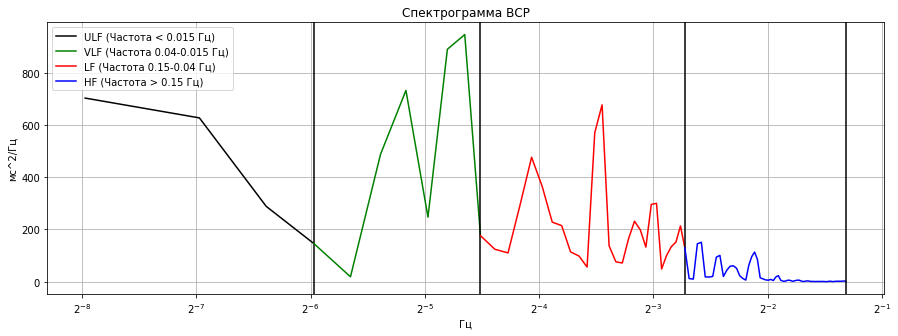

In [7]:
sample_fourier *= math.sqrt(2)

borders_freq = [0, 0.015, 0.04, 0.15, 0.4, float('+inf')]

final_values = np.array(abs(np.power(sample_fourier, 2)/(n_batch**2)))
final_values = [val.real for val in final_values]
final_values = final_values[0*n_batch:1*n_batch]
final_values[0] = final_values[1]

final_values[1:n_batch-1] = np.add(final_values[1:n_batch-1],final_values[1:n_batch-1])
final_values[1:n_batch-1] = np.add(final_values[1:n_batch-1],final_values[2:n_batch])
final_values[1:n_batch-1]/=np.ones(len(final_values)-2)*3

part = 0
final_vals = [[]]
final_freq = [[]]
for h, v in zip(freq, final_values):
    if h > borders_freq[part+1]:
        final_freq[part].append(h)
        final_vals[part].append(v)
        part+=1
        final_freq.append([])
        final_vals.append([])
    final_freq[part].append(h)
    final_vals[part].append(v)

plt.figure(figsize=(15, 5))
colors = ['black','green','red','blue']
labels = ['ULF (–ß–∞—Å—Ç–æ—Ç–∞ < 0.015 –ì—Ü)', 'VLF (–ß–∞—Å—Ç–æ—Ç–∞ 0.04-0.015 –ì—Ü)', 'LF (–ß–∞—Å—Ç–æ—Ç–∞ 0.15-0.04 –ì—Ü)', 'HF (–ß–∞—Å—Ç–æ—Ç–∞ > 0.15 –ì—Ü)']

for val, h, col, lab in zip(final_vals, final_freq, colors, labels):
    plt.plot(h, val, color = col, label = lab)
    plt.axvline(x=h[-1], color = 'black')
plt.grid()
x_label = plt.xlabel('–ì—Ü')
y_label = plt.ylabel('–º—Å^2/–ì—Ü')
title = plt.title('–°–ø–µ–∫—Ç—Ä–æ–≥—Ä–∞–º–º–∞ –í–°–†')
plt.xscale(value='log', basex=2)
plt.legend(ncol=1)
plt.show()

##### 4,5. –†–∞—Å—Å—á–∏—Ç–∞—Ç—å –º–æ—â–Ω–æ—Å—Ç–∏ —Å–ø–µ–∫—Ç—Ä–æ–≤ –≤ –∫–∞–∂–¥–æ–º –∏–∑ —É–∫–∞–∑–∞–Ω–Ω—ã—Ö –¥–∏–∞–ø–∞–∑–æ–Ω–µ —á–∞—Å—Ç–æ—Ç, —É–∫–∞–∑–∞—Ç—å –∏—Ö –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∏ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏—è, —Å—É–º–º–∞—Ä–Ω—É—é –º–æ—â–Ω–æ—Å—Ç—å —Å–ø–µ–∫—Ç—Ä–∞ –í–°–† –∏ –º–æ—â–Ω–æ—Å—Ç–∏ —Å–ø–µ–∫—Ç—Ä–∞ –≤ –∫–∞–∂–¥–æ–º —á–∞—Å—Ç–æ—Ç–Ω–æ–º –¥–∏–∞–ø–∞–∑–æ–Ω–µ –≤ –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–º –æ—Ç–Ω–æ—à–µ–Ω–∏–∏ –∫–æ –≤—Å–µ–º—É –¥–∏–∞–ø–∞–∑–æ–Ω—É.

In [8]:
f_max = []
f_min = []
power = []
for l in final_vals:
    f_max.append(max(l))
    f_min.append(min(l))
    power.append(sum(l))
total = sum(power)
print(f'–°—É–º–º–∞—Ä–Ω–∞—è –º–æ—â–Ω–æ—Å—Ç—å —Å–ø–µ–∫—Ç—Ä–∞ –í–°–† = {total}')
for mx, mn, pw, lab in zip(f_max, f_min, power, labels):
    print(f'–í –¥–∏–∞–ø–∞–∑–æ–Ω–µ {lab}:\n\t –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –º–æ—â–Ω–æ—Å—Ç–∏ = {mx}'+
            f'\n\t –ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –º–æ—â–Ω–æ—Å—Ç–∏ = {mn}'+
            f'\n\t –ú–æ—â–Ω–æ—Å—Ç—å = {pw}, —á—Ç–æ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç {pw/total*100}% –æ–±—â–µ–π –º–æ—â–Ω–æ—Å—Ç–∏')

–°—É–º–º–∞—Ä–Ω–∞—è –º–æ—â–Ω–æ—Å—Ç—å —Å–ø–µ–∫—Ç—Ä–∞ –í–°–† = 13149.60471668401
–í –¥–∏–∞–ø–∞–∑–æ–Ω–µ ULF (–ß–∞—Å—Ç–æ—Ç–∞ < 0.015 –ì—Ü):
	 –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –º–æ—â–Ω–æ—Å—Ç–∏ = 703.5264566402382
	 –ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –º–æ—â–Ω–æ—Å—Ç–∏ = 146.57681246304608
	 –ú–æ—â–Ω–æ—Å—Ç—å = 1766.2049225528674, —á—Ç–æ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 13.43161988977459% –æ–±—â–µ–π –º–æ—â–Ω–æ—Å—Ç–∏
–í –¥–∏–∞–ø–∞–∑–æ–Ω–µ VLF (–ß–∞—Å—Ç–æ—Ç–∞ 0.04-0.015 –ì—Ü):
	 –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –º–æ—â–Ω–æ—Å—Ç–∏ = 946.9462279450078
	 –ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –º–æ—â–Ω–æ—Å—Ç–∏ = 18.73926284598397
	 –ú–æ—â–Ω–æ—Å—Ç—å = 3647.1859487376987, —á—Ç–æ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 27.736088097843787% –æ–±—â–µ–π –º–æ—â–Ω–æ—Å—Ç–∏
–í –¥–∏–∞–ø–∞–∑–æ–Ω–µ LF (–ß–∞—Å—Ç–æ—Ç–∞ 0.15-0.04 –ì—Ü):
	 –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –º–æ—â–Ω–æ—Å—Ç–∏ = 677.6582016855538
	 –ú–∏–Ω–∏–º–∞–ª—

##### 6. –†–∞—Å—Å—á–∏—Ç–∞—Ç—å –∏–Ω–¥–µ–∫—Å —Ü–µ–Ω—Ç—Ä–∞–ª–∏–∑–∞—Ü–∏–∏ –ò–¶ (IC), –∏–Ω–¥–µ–∫—Å –≤–∞–≥–æ—Å–∏–º–ø–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è –ò–í–í –∏ –∏–Ω–¥–µ–∫—Å –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ –ø–æ–¥–∫–æ—Ä–∫–æ–≤—ã—Ö –Ω–µ—Ä–≤–Ω—ã—Ö —Ü–µ–Ω—Ç—Ä–æ–≤ –ò–ê–ü (ISCA).

In [9]:
n_to_i = {'HF':0, 'LF':1, 'VLF':2, 'ULF':3}
IC = (power[n_to_i['VLF']] + power[n_to_i['LF']])/power[n_to_i['HF']]
IVV = (power[n_to_i['LF']])/power[n_to_i['HF']]
ISCA = (power[n_to_i['LF']])/power[n_to_i['VLF']]
print('–ò–Ω–¥–µ–∫—Å—ã:')
print(f'\t–ò–Ω–¥–µ–∫—Å —Ü–µ–Ω—Ç—Ä–∞–ª–∏–∑–∞—Ü–∏–∏ –ò–¶ (IC): {IC}\n'+
      f'\t–ò–Ω–¥–µ–∫—Å –≤–∞–≥–æ—Å–∏–º–ø–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è –ò–í–í: {IVV}\n'+
      f'\t–ò–Ω–¥–µ–∫—Å –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ –ø–æ–¥–∫–æ—Ä–∫–æ–≤—ã—Ö –Ω–µ—Ä–≤–Ω—ã—Ö —Ü–µ–Ω—Ç—Ä–æ–≤ –ò–ê–ü (ISCA): {ISCA}')

–ò–Ω–¥–µ–∫—Å—ã:
	–ò–Ω–¥–µ–∫—Å —Ü–µ–Ω—Ç—Ä–∞–ª–∏–∑–∞—Ü–∏–∏ –ò–¶ (IC): 5.401730406453729
	–ò–Ω–¥–µ–∫—Å –≤–∞–≥–æ—Å–∏–º–ø–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è –ò–í–í: 2.0649845905004427
	–ò–Ω–¥–µ–∫—Å –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ –ø–æ–¥–∫–æ—Ä–∫–æ–≤—ã—Ö –Ω–µ—Ä–≤–Ω—ã—Ö —Ü–µ–Ω—Ç—Ä–æ–≤ –ò–ê–ü (ISCA): 0.6188618205880598


##### 7. –ê–Ω–∞–ª–∏–∑ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö

–ü–æ–∫–∞–∑–∞—Ç–µ–ª—å HF - –æ—Ç–≤–µ—á–∞–µ—Ç –∑–∞ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—ã–π —É—Ä–æ–≤–µ–Ω—å –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –ø–∞—Ä–∞—Å–∏–º–ø–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –∑–≤–µ–Ω–∞ —Ä–µ–≥—É–ª—è—Ü–∏–∏. –ú–æ—â–Ω–æ—Å—Ç—å –Ω–µ–≤–µ–ª–∏–∫–∞ - 11.3% –æ–±—â–µ–π –º–æ—â–Ω–æ—Å—Ç–∏. –ó–Ω–∞—á–µ–Ω–∏–µ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –º–æ—â–Ω–æ—Å—Ç–∏ –ª–µ–∂–∞—Ç –≤ –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ [0.009; 150.9] $msec^2/Hz$ .

–ü–æ–∫–∞–∑–∞—Ç–µ–ª—å LF - –æ—Ç–≤–µ—á–∞–µ—Ç –∑–∞ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—ã–π —É—Ä–æ–≤–µ–Ω—å –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –≤–∞–∑–æ–º–æ—Ç–æ—Ä–Ω–æ–≥–æ —Ü–µ–Ω—Ç—Ä–∞. –ü–æ—á—Ç–∏ –ø–æ–ª–æ–≤–∏–Ω–∞ –æ–±—â–µ–π –º–æ—â–Ω–æ—Å—Ç–∏ - 44.8%. –ó–Ω–∞—á–µ–Ω–∏–µ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –º–æ—â–Ω–æ—Å—Ç–∏ –ª–µ–∂–∞—Ç –≤ –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ [48.6; 677.7] $msec^2/Hz$

–ü–æ–∫–∞–∑–∞—Ç–µ–ª—å VLF - –æ—Ç–≤–µ—á–∞–µ—Ç –∑–∞ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—ã–π —É—Ä–æ–≤–µ–Ω—å –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ —Å–∏–º–ø–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –∑–≤–µ–Ω–∞ —Ä–µ–≥—É–ª—è—Ü–∏–∏. –ú–æ—â–Ω–æ—Å—Ç—å —É—Å—Ç—É–ø–∞–µ—Ç –ª–∏—à—å LF - 27.7% –æ—Ç –æ–±—â–µ–π. –ó–Ω–∞—á–µ–Ω–∏–µ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –º–æ—â–Ω–æ—Å—Ç–∏ –ª–µ–∂–∞—Ç –≤ –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ [18.7; 947] $msec^2/Hz$

–ü–æ–∫–∞–∑–∞—Ç–µ–ª—å ULF - –æ—Ç–≤–µ—á–∞–µ—Ç –∑–∞ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—ã–π —É—Ä–æ–≤–µ–Ω—å –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ —Å—É–±–∫–æ—Ä—Ç–∏–∫–∞–ª—å–Ω—ã—Ö —É—Ä–æ–≤–Ω–µ–π —Ä–µ–≥—É–ª—è—Ü–∏–∏ (–≤—ã—Å—à–∏—Ö –≤–µ–≥–µ—Ç–∞—Ç–∏–≤–Ω—ã—Ö —Ü–µ–Ω—Ç—Ä–æ–≤). –ú–æ—â–Ω–æ—Å—Ç—å - 13.4% –æ–±—â–µ–π –º–æ—â–Ω–æ—Å—Ç–∏, –∫–∞–∫ –∏ HF - –Ω–µ–≤–µ–ª–∏–∫–∞ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –¥—Ä—É–≥–∏—Ö. –ó–Ω–∞—á–µ–Ω–∏–µ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –º–æ—â–Ω–æ—Å—Ç–∏ –ª–µ–∂–∞—Ç –≤ –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ [146.6; 703.5] $msec^2/Hz$

–ò–Ω–¥–µ–∫—Å —Ü–µ–Ω—Ç—Ä–∞–ª–∏–∑–∞—Ü–∏–∏ –æ—Ç—Ä–∞–∂–∞–µ—Ç —Å—Ç–µ–ø–µ–Ω—å —Ü–µ–Ω—Ç—Ä–∞–ª–∏–∑–∞—Ü–∏–∏ —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è —Ä–∏—Ç–º–æ–º —Å–µ—Ä–¥—Ü–∞ (–ø—Ä–µ–æ–±–ª–∞–¥–∞–Ω–∏—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ —Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–≥–æ –∫–æ–Ω—Ç—É—Ä–∞ —Ä–µ–≥—É–ª—è—Ü–∏–∏ –Ω–∞–¥ –∞–≤—Ç–æ–Ω–æ–º–Ω—ã–º, —Ç.–µ. –ø—Ä–µ–æ–±–ª–∞–¥–∞–Ω–∏–µ –Ω–µ–¥—ã—Ö–∞—Ç–µ–ª—å–Ω—ã—Ö —Å–æ—Å—Ç–∞–≤–ª—è—é—â–∏—Ö —Å–∏–Ω—É—Å–æ–≤–æ–π –∞—Ä–∏—Ç–º–∏–∏ –Ω–∞–¥ –¥—ã—Ö–∞—Ç–µ–ª—å–Ω—ã–º–∏). –í –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ –æ–Ω —Ä–∞–≤–µ–Ω $5.4$.

–ò–Ω–¥–µ–∫—Å –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ –ø–æ–¥–∫–æ—Ä–∫–æ–≤—ã—Ö –Ω–µ—Ä–≤–Ω—ã—Ö —Ü–µ–Ω—Ç—Ä–æ–≤ –ò–ê–ü —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏–∑—É–µ—Ç –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç–æ–≥–æ –ø–æ–¥–∫–æ—Ä–∫–æ–≤–æ–≥–æ –Ω–µ—Ä–≤–Ω–æ–≥–æ —Ü–µ–Ω—Ç—Ä–∞ –ø–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—é –∫ –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–º —É—Ä–æ–≤–Ω—è–º —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è. –£–≤–µ–ª–∏—á–µ–Ω–∏–µ –ò–ê–ü —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –æ –ø–æ–≤—ã—à–µ–Ω–Ω–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –ø–æ–¥–∫–æ—Ä–∫–æ–≤—ã—Ö –Ω–µ—Ä–≤–Ω—ã—Ö —Ü–µ–Ω—Ç—Ä–æ–≤. –í –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ –æ–Ω —Ä–∞–≤–µ–Ω $0.6$.